In [1]:
import pandas as pd
import numpy as np
import lightkurve as lk
import matplotlib.pyplot as plt

%run setup.py

In [2]:
plt.style.use('science')

In [13]:
df = pd.read_csv('data/dsct.csv', dtype={'kic': np.int64})
bg = pd.read_csv('data/catalogues/berger_2020.tsv', delimiter='\t')
df = pd.merge(df, bg, left_on='kic', right_on='KIC')

In [14]:
# Stellar tracks
Lcolnames = ["T11", "L11", "G11", "T12", "L12", "G12", "T13", "L13", "G13", "T14", "L14", "G14", "T15", "L15", "G15", "T16", "L16", "G16", "T17", "L17", "G17", "T18", "L18", "G18", "T19", "L19", "G19", "T20", "L20", "G20", "T21", "L21", "G21", "T22", "L22", "G22", "T23", "L23", "G23", "T24", "L24", "G24", "T25", "L25", "G25"]
Ltracks = pd.read_csv("data/tracks/mesa10108_as09_opal_exp150_mlt180_D000_z140x071_orig.csv",  header=None, sep=" ", names=Lcolnames, skiprows=([0]))
msL = pd.DataFrame(data={"Tms": Ltracks.loc[0][0::3].values, "Lms": Ltracks.loc[0][1::3].values, "Gms": Ltracks.loc[0][2::3].values})

In [15]:
df

,Unnamed: 0,kic,KIC,Mass,E_Mass,e_Mass,Teff,E_Teff,e_Teff,logg,...,Age,f_Age,E_Age,e_Age,Dist,E_Dist,e_Dist,Avmag,GOF,TAMS
0,0,1026294,1026294,1.740,0.083,-0.083,7768.1,185.5,-186.2,4.060,...,0.84,,0.19,-0.18,917.1,25.6,-25.6,0.217,1.0000,1.54
1,2,1163943,1163943,1.421,0.059,-0.055,7090.0,152.4,-157.5,3.713,...,1.74,,0.18,-0.15,783.9,24.5,-22.4,0.186,1.0000,1.85
2,3,1294670,1294670,2.126,0.086,-0.092,7197.6,158.6,-147.6,3.618,...,0.79,,0.09,-0.07,1601.8,70.7,-66.5,0.310,0.9926,0.95
3,4,1430590,1430590,1.814,0.082,-0.083,7431.2,163.9,-156.8,3.988,...,0.85,,0.16,-0.16,1089.2,37.6,-37.5,0.774,0.9920,1.52
4,5,1431794,1431794,1.476,0.148,-0.098,7311.9,160.4,-167.4,3.839,...,1.63,,0.28,-0.37,1101.2,32.9,-33.4,0.341,1.0000,1.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2264,2349,12357103,12357103,1.993,0.074,-0.078,6355.3,124.1,-120.7,3.368,...,0.97,,0.06,-0.06,2538.7,89.3,-86.6,0.341,1.0000,1.10
2265,2350,12504812,12504812,1.707,0.090,-0.088,7534.0,170.3,-190.7,4.057,...,0.89,,0.24,-0.22,1088.4,31.1,-28.1,0.251,1.0000,1.69
2266,2351,12520187,12520187,1.666,0.091,-0.098,6810.6,145.7,-139.9,3.864,...,1.32,,0.25,-0.19,608.0,34.8,-33.1,0.124,1.0000,1.79
2267,2352,12603159,12603159,1.926,0.097,-0.089,8544.0,241.0,-209.9,4.117,...,0.53,,0.14,-0.15,474.1,10.2,-9.7,0.248,0.9984,1.15


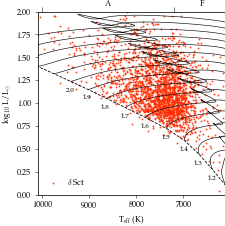

In [19]:
plt.figure(figsize=mnras_size(242.26653, square=True))

for n, mass in zip(np.arange(0,len(Lcolnames)/3), np.arange(1.1,2.7,0.1)):
    plt.plot(Ltracks.iloc[:,int(3*n+0)],Ltracks.iloc[:,int(3*n+1)],c='black',linewidth=0.6)
    if (mass > 1.2) & (mass < 2.1):
        plt.text(Ltracks.iloc[:,int(3*n+0)][0]+20, Ltracks.iloc[:,int(3*n+1)][0]-0.1, str(np.round(mass,2)), c='black',horizontalalignment='center',verticalalignment='center', fontsize=7)
plt.plot(msL['Tms'], msL['Lms'], c='black', linewidth=0.8, linestyle='dashed')
# give the plot frame the right parameters / aesthetics
plt.xlabel(r"T$_{\rm eff}$ (K)")
plt.ylabel(r"log$_{10}$ L/L$_{\odot}$")
plt.ylim(0.0,2.)
plt.xlim(6100,10100)
plt.gca().invert_xaxis()

plt.errorbar(df['Teff'], (df['Lum']), fmt='.', c='C3',elinewidth=0.7, markersize=2,zorder=1, alpha=0.7, rasterized=True,
             label=r'$\delta$ Sct'
#             markeredgecolor='white'
            )
# m = df['dSct'] > 0
# plt.errorbar(df[m]['Teffi'], (df[m]['loglbol_g_median']), fmt='.', c='C3',elinewidth=0.7, markersize=2,zorder=1, alpha=0.7,
#              label=r'$\delta$ Sct'
# #             markeredgecolor='white'
#             )
# m = df['gdor'] == True
# plt.errorbar(df[m]['Teffi'], np.log10(df[m]['lum']), fmt='.', c='C0',elinewidth=0.7, markersize=2,zorder=1, alpha=0.7,
#              label=r'$\gamma$ Dor'
# #             markeredgecolor='white'
#             )

plt.legend(fontsize=8)

colors = np.array([
    [146,181,255],
    [162,192,255],
    [213,224,255],
    [249,245,255],
    [255,237,227],
    [255,218,181],
    [255,181,108]
]) / 255

classes = np.array([
    [30000, 50000],
    [10000,10500],
    [7200,10000],
    [6000,7200],
    [5200,6000],
    [3700,5200],
    [3000,3700]
])


ax2 = plt.twiny()
ax2.set_xlim(10100,6100)


# Major ticks
ticks2 = [3700,5200,6000,7200,10000]
ax2.set_xticks(ticks2)
ax2.set_xticklabels([])
ax2.tick_params(axis='x', which="major", length=5)
ax2.set_xlim(10100,6100)

# Minor ticks
ticks1 = np.average(classes, axis=1)
labs = ['O', 'B', 'A', 'F', 'G', 'K', 'M']
ax2.set_xticks(ticks1, minor=True)
ax2.set_xticklabels(labs, minor=True)
ax2.tick_params(axis='x', which="minor",length=0)
ax2.set_xlim(10100,6100)

plt.savefig('figs/HRD.pdf', bbox_inches='tight', pad_inches=0.)

(10100.0, 6100.0)

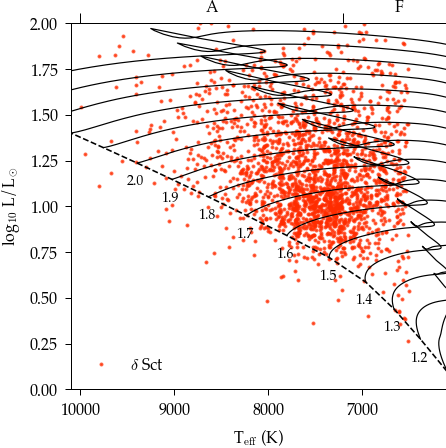

In [13]:
# plt.figure(figsize=mnras_size(242.26653, square=True))

# for n, mass in zip(np.arange(0,len(Lcolnames)/3), np.arange(1.1,2.7,0.1)):
#     plt.plot(Ltracks.iloc[:,int(3*n+0)],Ltracks.iloc[:,int(3*n+1)],c='black',linewidth=0.6)
#     if (mass > 1.2) & (mass < 2.1):
#         plt.text(Ltracks.iloc[:,int(3*n+0)][0]+20, Ltracks.iloc[:,int(3*n+1)][0]-0.1, str(np.round(mass,2)), c='black',horizontalalignment='center',verticalalignment='center', fontsize=7)
# plt.plot(msL['Tms'], msL['Lms'], c='black', linewidth=0.8, linestyle='dashed')
# # give the plot frame the right parameters / aesthetics
# plt.xlabel(r"T$_{\rm eff}$ (K)")
# plt.ylabel(r"log$_{10}$ L/L$_{\odot}$")
# plt.ylim(0.0,2.)
# plt.xlim(6100,10100)
# plt.gca().invert_xaxis()

# m = df['dSct'] > 0
# plt.errorbar(df[m]['Teffi'], (df[m]['loglbol_g_median']), fmt='.', c='C3',elinewidth=0.7, markersize=2,zorder=1, alpha=0.7,
#              label=r'$\delta$ Sct'
# #             markeredgecolor='white'
#             )
# # m = df['gdor'] == True
# # plt.errorbar(df[m]['Teffi'], np.log10(df[m]['lum']), fmt='.', c='C0',elinewidth=0.7, markersize=2,zorder=1, alpha=0.7,
# #              label=r'$\gamma$ Dor'
# # #             markeredgecolor='white'
# #             )

# plt.legend(fontsize=8)

# colors = np.array([
#     [146,181,255],
#     [162,192,255],
#     [213,224,255],
#     [249,245,255],
#     [255,237,227],
#     [255,218,181],
#     [255,181,108]
# ]) / 255

# classes = np.array([
#     [30000, 50000],
#     [10000,10500],
#     [7200,10000],
#     [6000,7200],
#     [5200,6000],
#     [3700,5200],
#     [3000,3700]
# ])


# ax2 = plt.twiny()
# ax2.set_xlim(10100,6100)


# # Major ticks
# ticks2 = [3700,5200,6000,7200,10000]
# ax2.set_xticks(ticks2)
# ax2.set_xticklabels([])
# ax2.tick_params(axis='x', which="major", length=5)
# ax2.set_xlim(10100,6100)

# # Minor ticks
# ticks1 = np.average(classes, axis=1)
# labs = ['O', 'B', 'A', 'F', 'G', 'K', 'M']
# ax2.set_xticks(ticks1, minor=True)
# ax2.set_xticklabels(labs, minor=True)
# ax2.tick_params(axis='x', which="minor",length=0)
# ax2.set_xlim(10100,6100)

# # plt.savefig(overleaf_path + 'HRD.pdf')